#Abstract / BLUF:#
Heart failure is the leading cause of death globally, making it crucial to develop models that can accurately predict individuals at risk. A model with the ability to do so can significantly benefit drug manufacturers, healthcare professionals, and patients by aiding in risk assessment for heart failure. **The most successful model achieved an accuracy of 87% and a recall of 91%, using an Extra Trees algorithm.** This model minimizes false negatives, which are potentially the most dangerous type of error in this context. False negatives occur when individuals at high risk for heart failure are incorrectly assessed as being at low risk, making it essential for the model to minimize these occurrences to ensure patients are appropriately informed of their risk.

It is important to recognize that the current dataset, consisting of only 918 data points, is not sufficiently large to build a robust model. The shortage of data prevented the training and validation accuracy scores from fully converging, indicating that more data is needed to refine the model's predictions. Since medical data is notoriously challenging to collect, acquiring additional data could substantially improve future analyses and enhance the model's effectiveness and reliability for clinical use.



# Background and Business Problem:#
“Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.”
- Kaggle Dataset Author (Username: FEDESORIANO) https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction  

The business problem at hand is the prediction of heart failure among patients, utilizing a variety of health data points. Early identification of potential heart failure is crucial in healthcare as it can significantly improve patient outcomes through timely medical interventions. This predictive technology has the potential to benefit a range of entities, including hospitals, pharmaceutical companies, and insurance agencies. These stakeholders can use the model not only to pinpoint individuals at high risk of heart failure but also to identify potential participants for drug trials. Additionally, the model could help insurance companies determine which customers might warrant higher health insurance premiums based on their elevated risk levels. This multifaceted application underscores the model’s importance and utility in transforming healthcare practices and patient management.


In [ ]:
!pip install pycaret
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 22.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 k

In [ ]:
#import packages
# Data manipulation and cleaning
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning - Model selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Boosting algorithms
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Settings to improve the default visualizations
sns.set(style="whitegrid")  # Setting seaborn style for better visuals
plt.rcParams["figure.figsize"] = (10, 6)  # Default figure size for better visibility

## Dataset Used##

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [ ]:
# Import necessary libraries
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

# Specify the path to your file
file_path = '/content/drive/My Drive/Johns Hopkins BARM/big data machine learning/heart.csv'  # Update 'path_to_your_file' with the actual path to your file in Google Drive


# Read the CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(data)

print("Statistical summary of numeric columns:")
print(data.describe())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        1

## Data Cleaning

In [ ]:
# 1. Check for duplicate rows
duplicates = data.duplicated()
if duplicates.any():
    print("Duplicate rows found:")
    print(data[duplicates])
else:
    print("No duplicate rows found.")

# Optional: Remove duplicates if necessary
# data = data.drop_duplicates()

# 2. Check for missing values (NaNs)
if data.isnull().any().any():
    print("Missing values found:")
    print(data.isnull().sum())
else:
    print("No missing values found.")


# 3. Check for inconsistencies in categorical data
print("Unique values in categorical columns:")
for column in data.select_dtypes(include=['object']).columns:
    print(f"{column}: {data[column].unique()}")

# If needed, examine specific columns for range or unexpected values
# For example, check 'Age' for any values that are unrealistic
print("Check for unrealistic Age entries:")
print(data[data['Age'] < 0] + data[data['Age'] > 120])  # Adjust conditions as per realistic expectations


No duplicate rows found.
No missing values found.
Unique values in categorical columns:
Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
RestingECG: ['Normal' 'ST' 'LVH']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']
Check for unrealistic Age entries:
Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


## Exploritory Data analysis##

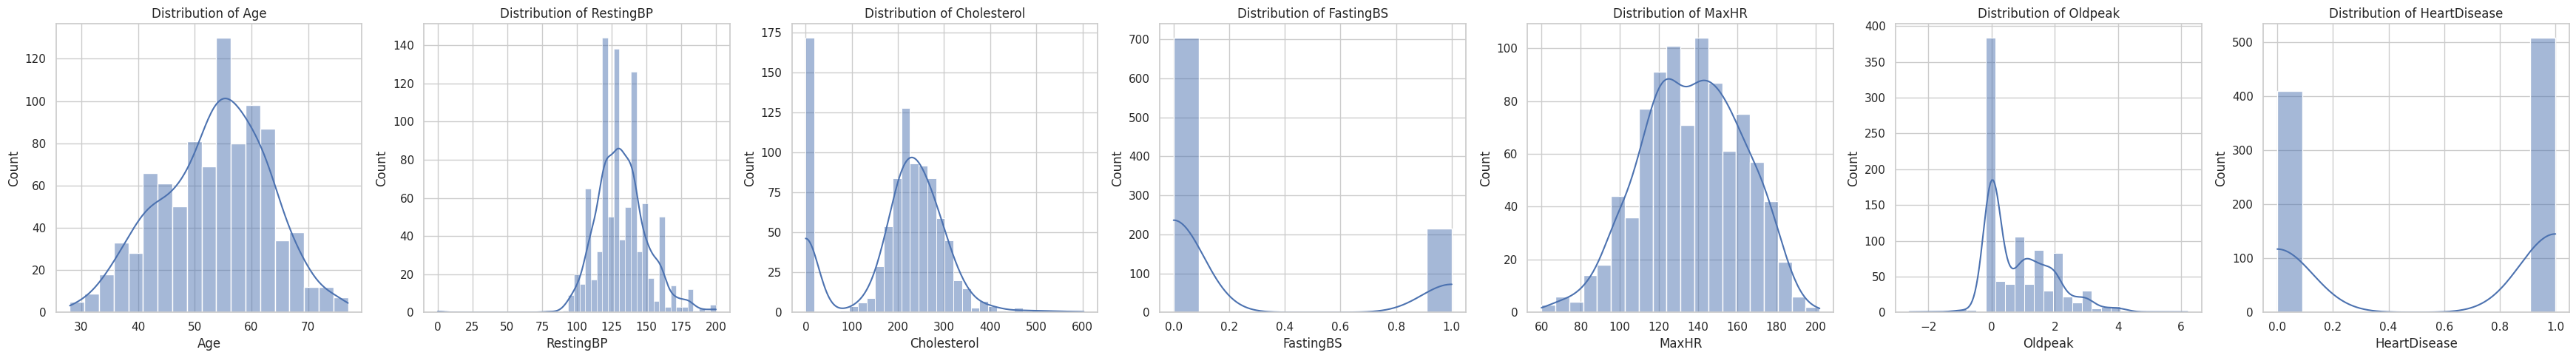

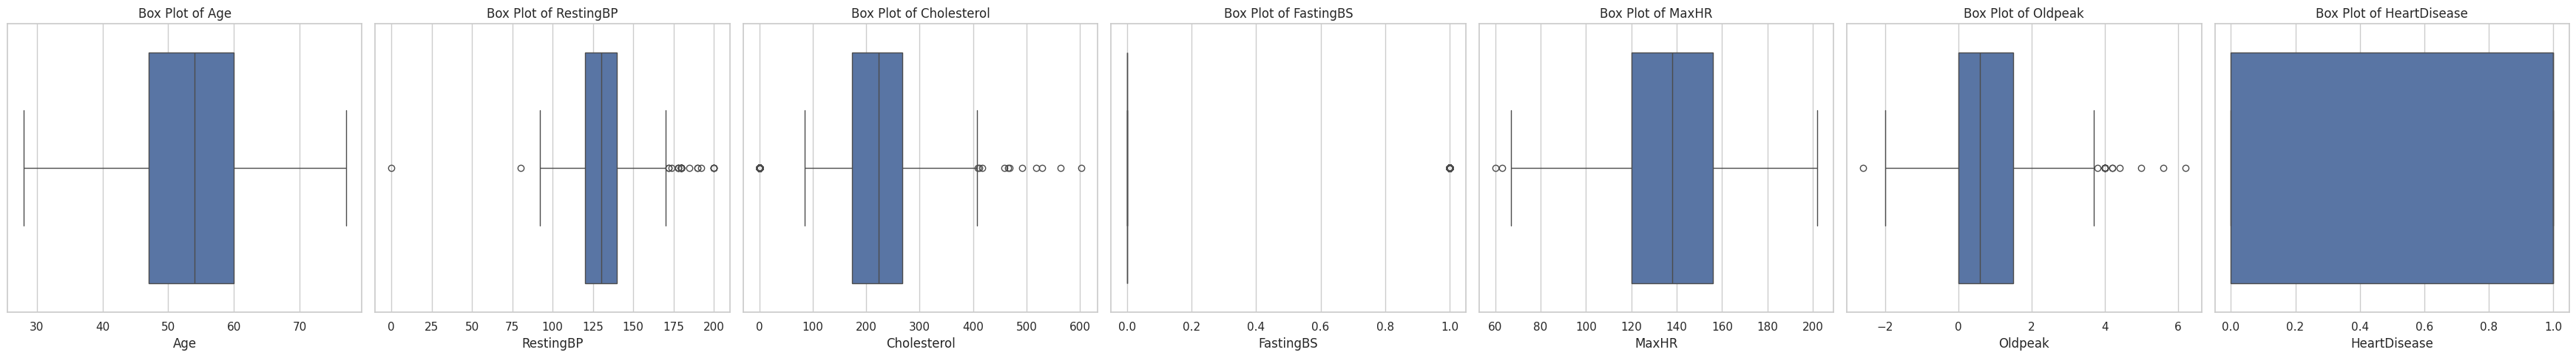

Value counts for Sex:
Sex
M    725
F    193
Name: count, dtype: int64

Value counts for ChestPainType:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

Value counts for RestingECG:
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

Value counts for ExerciseAngina:
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

Value counts for ST_Slope:
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64



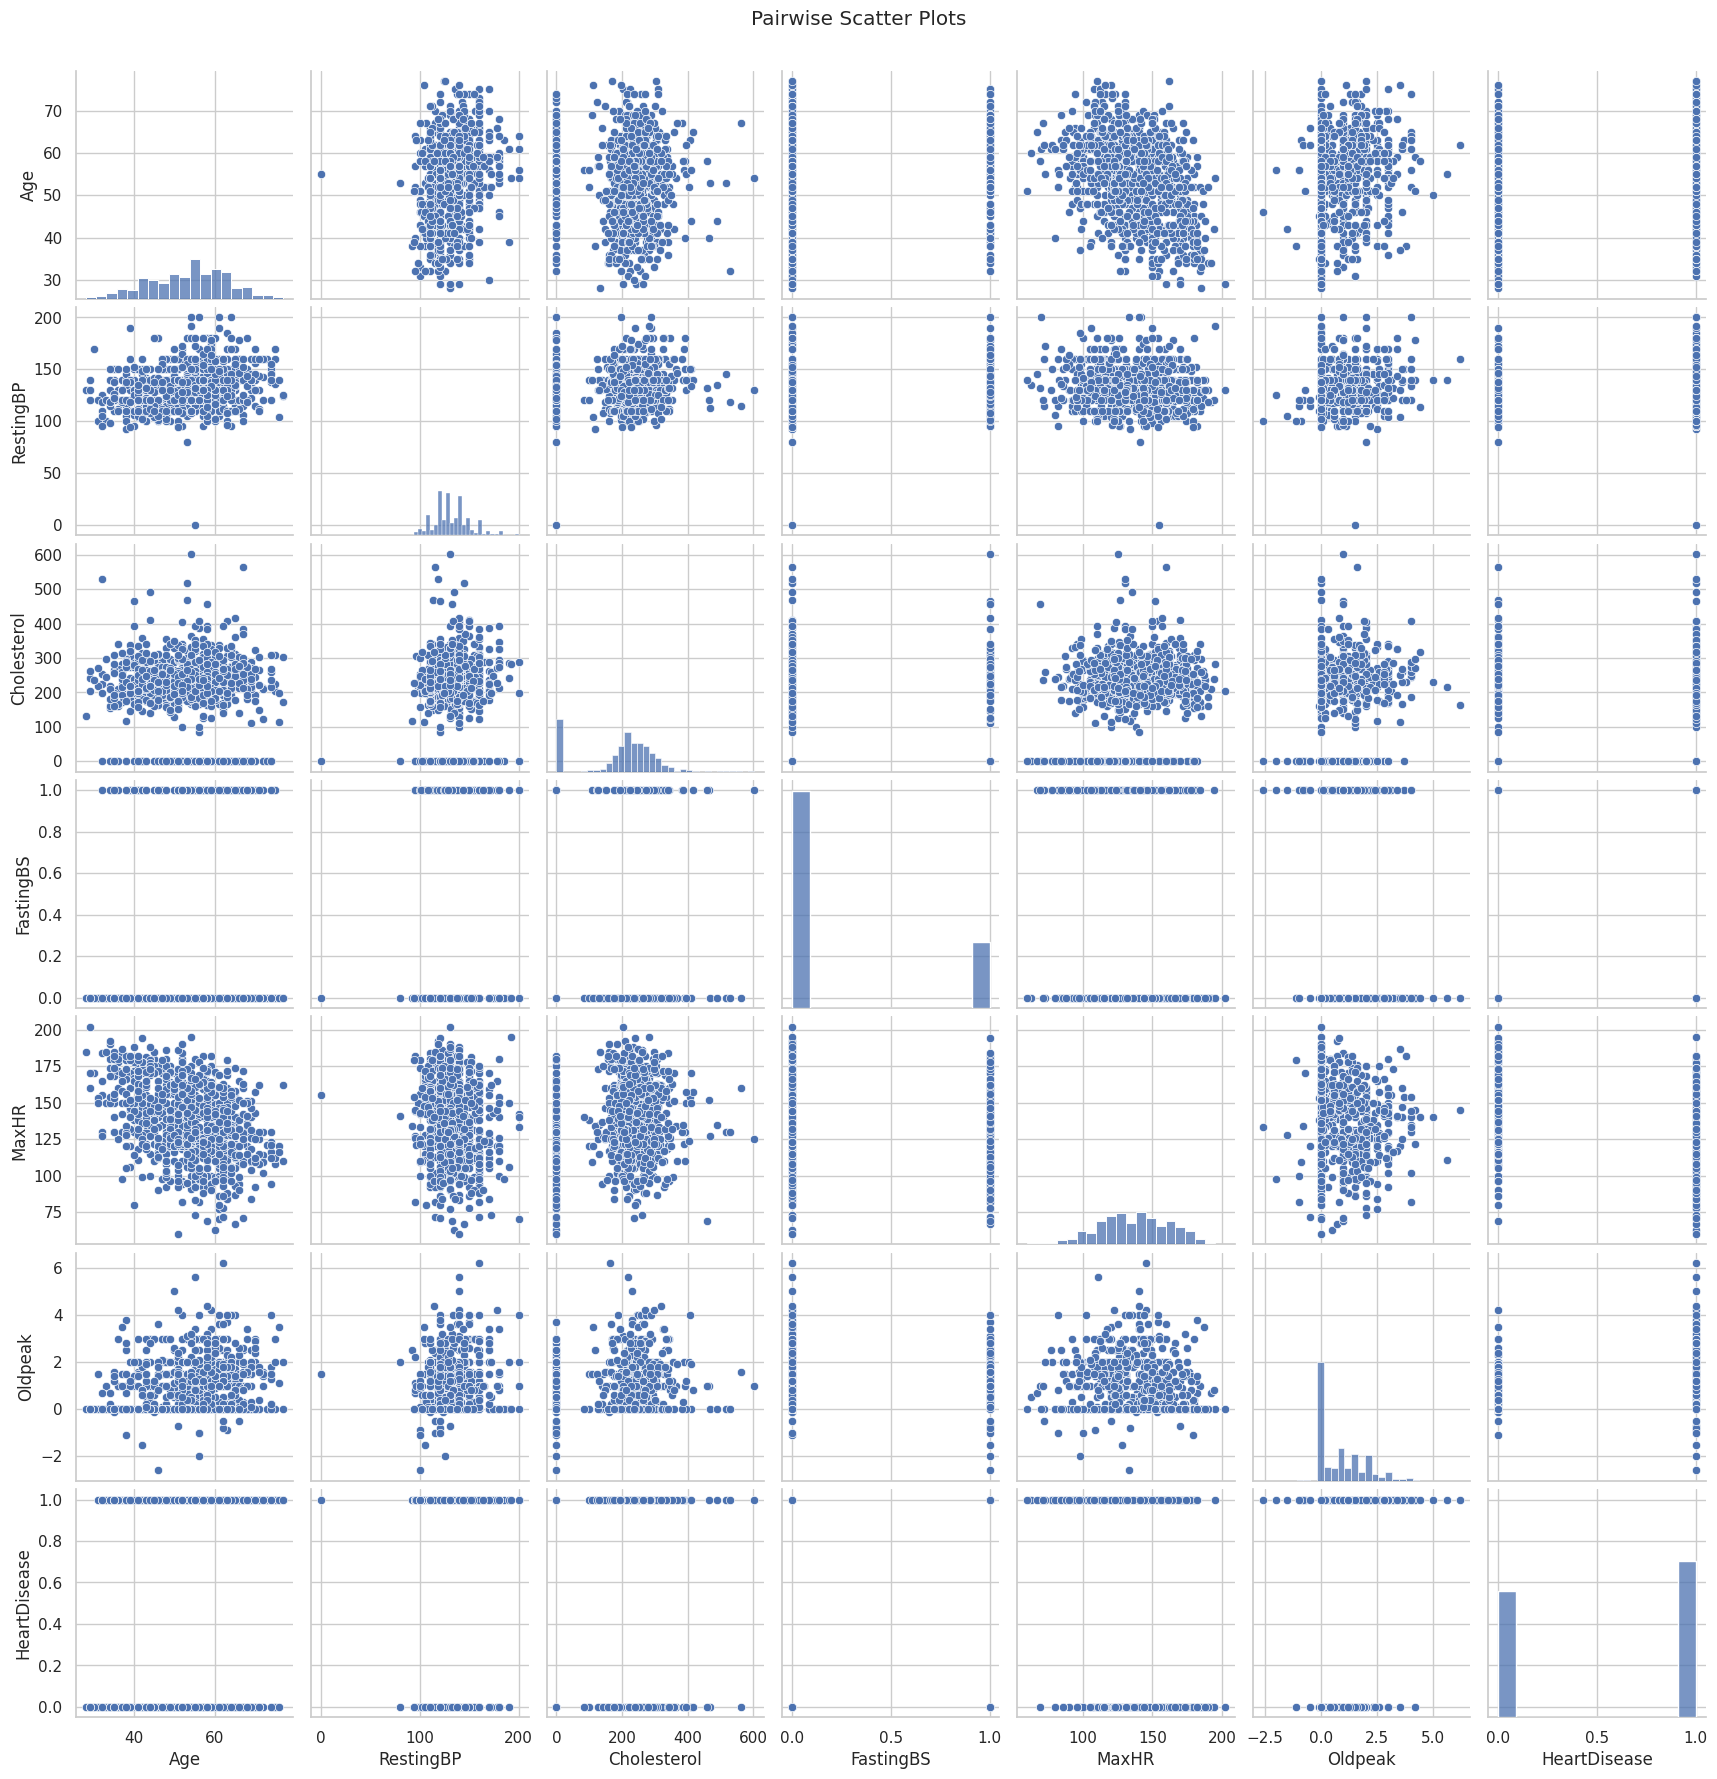

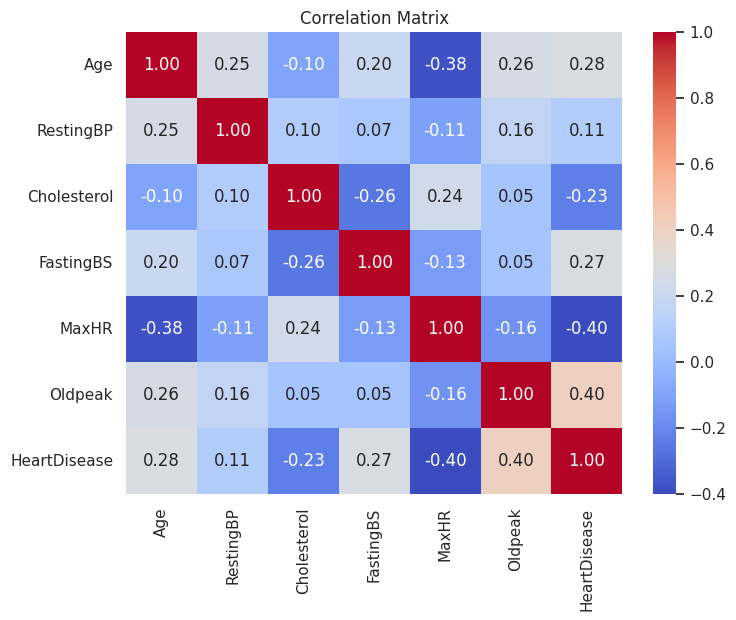

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the visualization environment
sns.set(style="whitegrid")

# Data loading and preparation step assumed
# data = ...

# 1. Distribution of each numeric column
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(5 * len(numeric_columns), 5))
for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 2. Box plots for numeric columns to spot outliers
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(5 * len(numeric_columns), 5))
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# 3. Value counts for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print()

# 4. Pairwise relationships and correlations for numeric columns
sns.pairplot(data[numeric_columns])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

# Correlation matrix
corr_matrix = data[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



### Observations:###
- Most data points have close to normal distribution except Oldpeak and binary variables
- MaxHR has the largest negative correlation with heart disease and - - OldPeak has the largest positive correlation
- Interestingly, this dataset shows a negative relationship between cholesterol levels and heart disease. This is likely due to the 175  rows (almost 175) that have a cholesterol measurement of 0, which is impossible, so it will be important to impute these 0s with meaningful values.


## Data Engineering##
- The cholesterol data includes almost 175 rows with values of 0 for cholesterol. It is impossible to have blood cholesterol of 0 so these must be mistakes.  I used KNN imputing to replace the 0s with the most reasonable value based on five nearby data points (n_neighbors=5)  
- All categorical variables were converted to binary using One-hot encoding.
- All continuous numerical variables were scaled


#### Convert Categorical Columns to Integers###

In [ ]:
# Apply one-hot encoding and explicitly convert to integer
categorical_columns = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True).astype(int)

### Scale Data and Impute Cholesterol values equal to 0 with reasonable values using KNN Imputing ###
- The cholesterol data includes almost 175 rows with values of 0 for cholesterol. It is impossible to have blood cholesterol of 0 so these must be mistakes.  I used KNN imputing to replace the 0s with the most reasonable value based on five nearby data points (n_neighbors=5)  

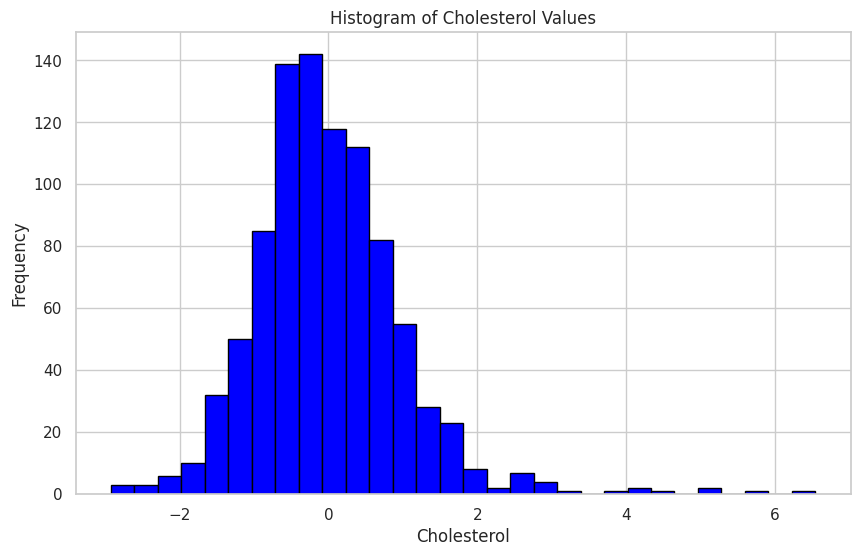

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Assuming data_encoded is already loaded

# Step 1: Convert zeros in the 'Cholesterol' column to NaN (use np.nan explicitly)
data_encoded['Cholesterol'] = data_encoded['Cholesterol'].replace(0, np.nan)

# Step 2: Prepare to impute
# Exclude 'HeartDisease' if it's the target
features = data_encoded.drop(columns=['HeartDisease'])
imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputer (ensure all pd.NA are converted to np.nan)
features = features.astype(float)  # This ensures compatibility by converting all types explicitly to float
features_imputed = imputer.fit_transform(features)
features_imputed = pd.DataFrame(features_imputed, columns=features.columns)

# Step 3: Scale the data after imputation
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)

# Step 4: Re-add the HeartDisease column if it was removed before
data_encoded = pd.concat([features_scaled, data_encoded['HeartDisease'].reset_index(drop=True)], axis=1)

#check that it worked
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.hist(data_encoded['Cholesterol'].dropna(), bins=30, color='blue', edgecolor='black')  # dropna to ignore missing values
plt.title('Histogram of Cholesterol Values')  # Adding a title to the histogram
plt.xlabel('Cholesterol')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.grid(True)  # Adding a grid for better readability
plt.show()  # Display the plot


# Model Building#

# PyCaret Model #
- PyCaret is an open-source, low-code machine learning library in Python—that streamlines the process of building and deploying machine learning models. I chose PyCaret for its ability to simplify many of the steps typically required in a machine-learning pipeline, including preprocessing, model selection, tuning, evaluation, and deployment. Below are the results of all the models produced by the PyCaret model.


In [ ]:
from pycaret.classification import *

,Description,Value
0,Session id,123
1,Target,HeartDisease
2,Target type,Binary
3,Original data shape,"(918, 16)"
4,Transformed data shape,"(918, 16)"
5,Transformed train set shape,"(734, 16)"
6,Transformed test set shape,"(184, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8679,0.9142,0.9089,0.8612,0.8840,0.7308,0.7332,0.0720
lr,Logistic Regression,0.8597,0.9196,0.8867,0.8639,0.8749,0.7152,0.7161,0.7740
gbc,Gradient Boosting Classifier,0.8570,0.9154,0.8916,0.8562,0.8733,0.7092,0.7106,0.0620
rf,Random Forest Classifier,0.8570,0.9155,0.9014,0.8500,0.8747,0.7085,0.7108,0.0880
knn,K Neighbors Classifier,0.8557,0.8941,0.8916,0.8537,0.8722,0.7065,0.7076,0.5480
ridge,Ridge Classifier,0.8556,0.9213,0.8867,0.8576,0.8717,0.7067,0.7078,0.0200
lda,Linear Discriminant Analysis,0.8556,0.9212,0.8867,0.8576,0.8717,0.7067,0.7078,0.0160
nb,Naive Bayes,0.8556,0.9167,0.8670,0.8717,0.8691,0.7080,0.7084,0.0180
qda,Quadratic Discriminant Analysis,0.8406,0.9031,0.8597,0.8535,0.8564,0.6774,0.6778,0.0180
xgboost,Extreme Gradient Boosting,0.8392,0.9035,0.8768,0.8395,0.8577,0.6731,0.6742,0.0420


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8378,0.9217,0.9024,0.8222,0.8605,0.6679,0.6720
1,0.8108,0.8847,0.8049,0.8462,0.8250,0.6194,0.6203
2,0.8243,0.9268,0.8049,0.8684,0.8354,0.6476,0.6498
3,0.8919,0.9475,0.9024,0.9024,0.9024,0.7812,0.7812
4,0.8082,0.8681,0.9268,0.7755,0.8444,0.5995,0.6159
5,0.9041,0.9390,0.8780,0.9474,0.9114,0.8072,0.8100
6,0.8219,0.9205,0.8250,0.8462,0.8354,0.6415,0.6417
7,0.7671,0.9061,0.8250,0.7674,0.7952,0.5262,0.5280
8,0.8630,0.9402,0.8250,0.9167,0.8684,0.7264,0.7308


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


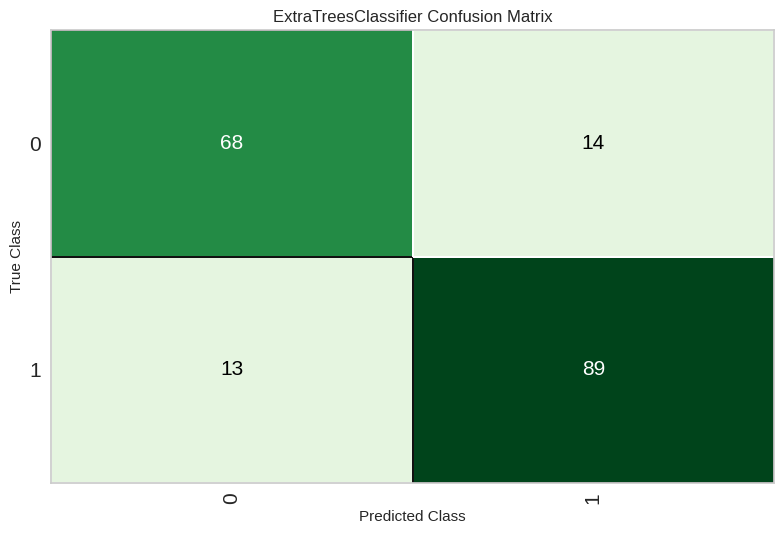

Accuracy: 0.50
Precision: 0.49
Recall: 0.52
F1-Score: 0.51


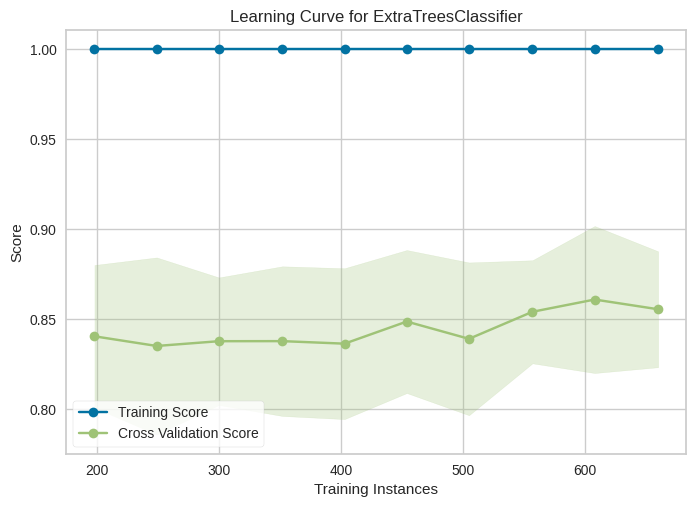

In [ ]:
# Setup the environment in PyCaret
clf = setup(data=data_encoded, target='HeartDisease',
            train_size=0.8, normalize=True, session_id=123)

# Compare models and select the best one based on default metrics
best_model = compare_models(fold=5) #use 5 folds instead of 10 to minimize compute usage and time

# Tune the best model to optimize accuracy
tuned_model = tune_model(best_model, optimize='Accuracy')

# Plot a confusion matrix for the tuned model
plot_model(tuned_model, plot='confusion_matrix')
# Retrieve the confusion matrix as a pandas DataFrame
cm_df = pull()

# Calculate metrics from the confusion matrix
# Assuming binary classification: indices [0,0] (True Negative), [1,1] (True Positive),
# [0,1] (False Positive), [1,0] (False Negative)
TN = cm_df.iloc[0, 0]
TP = cm_df.iloc[1, 1]
FP = cm_df.iloc[0, 1]
FN = cm_df.iloc[1, 0]

# Calculate accuracy, precision, recall, and F1-score
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")
# Plot learning curves for the tuned model
plot_model(tuned_model, plot='learning')

# Finalize the model: trains on the entire dataset
final_model = finalize_model(tuned_model)

## Random Forest ##
- Random forest model had best performance before imputation of cholestorol values. Below the model will see if using grid search with a radom forest can complete with the extra trees model in the PyCaret above.

Fitting 5 folds for each of 36 candidates, totalling 180 fits
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        77
           1       0.88      0.86      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Accuracy: 0.8532608695652174


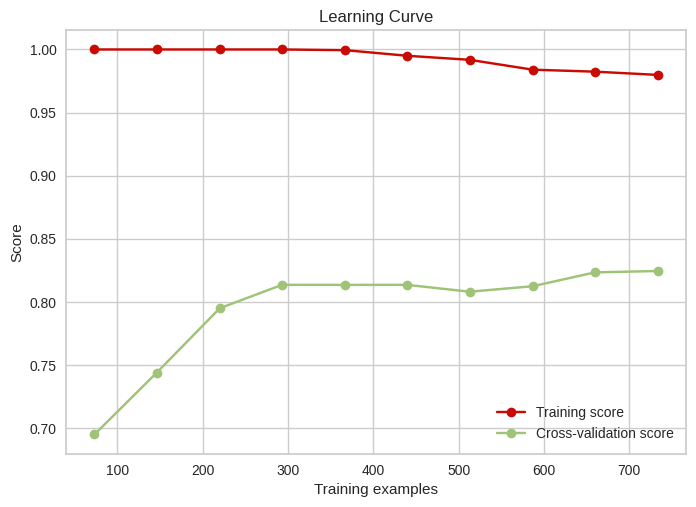

Confusion Matrix:
[[65 12]
 [15 92]]


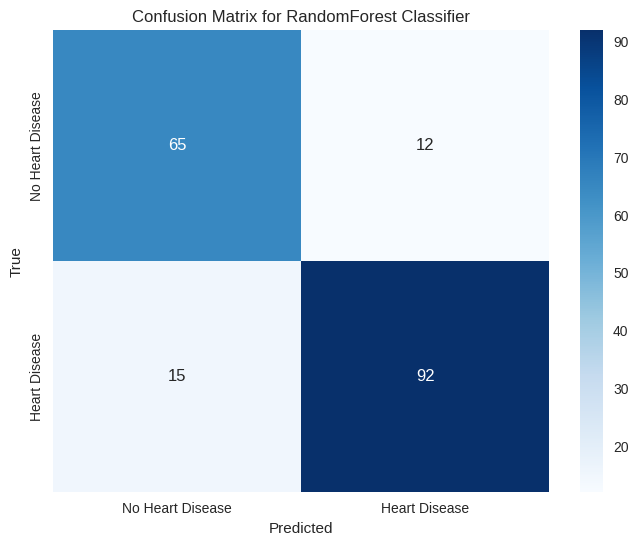

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the data
#data_encoded = pd.read_csv('path_to_your_encoded_data.csv')  # Adjust this path
X = data_encoded.drop('HeartDisease', axis=1)
y = data_encoded['HeartDisease']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best estimator
best_rf = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_rf, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualizing the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for RandomForest Classifier')
plt.show()

# Unadjusted Extra Trees Model#

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Accuracy: 0.8586956521739131
Confusion Matrix:
[[65 12]
 [14 93]]


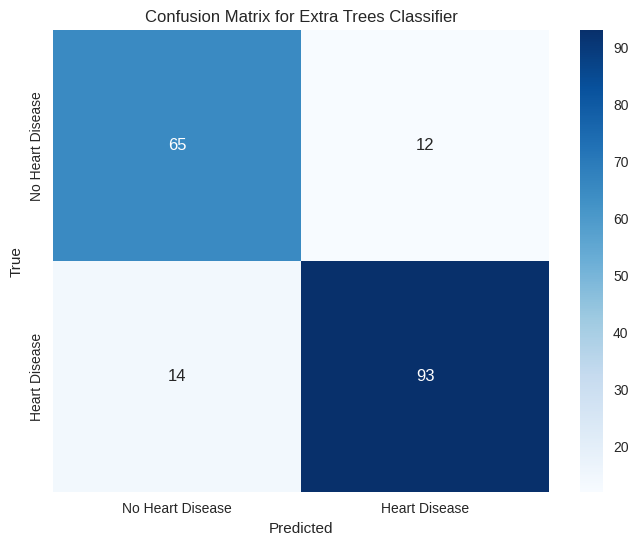

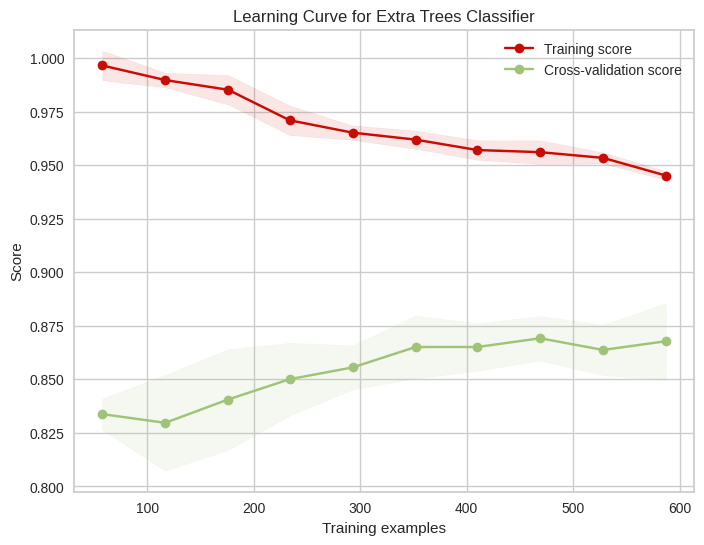

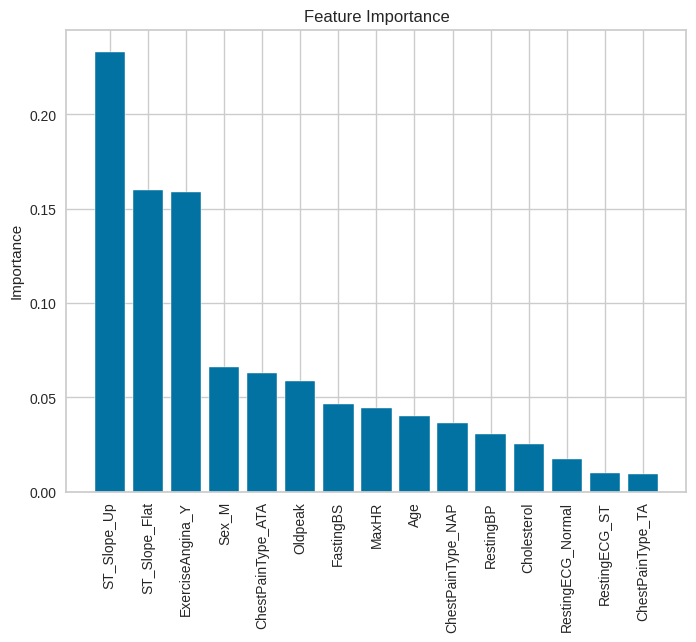

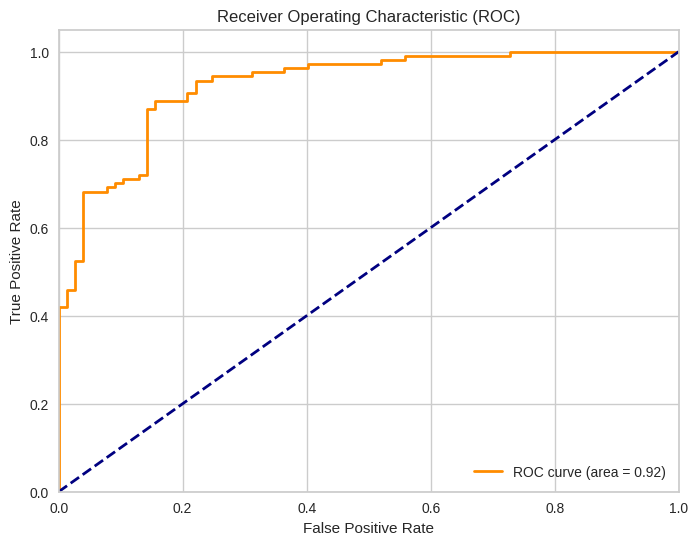

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

# Assuming you have a DataFrame `data_encoded` ready with the target column named 'HeartDisease'
X = data_encoded.drop('HeartDisease', axis=1)
y = data_encoded['HeartDisease']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Extra Trees Classifier
etc = ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42)

# Fit the model
etc.fit(X_train, y_train)

# Predict on the test set once and use this prediction for subsequent evaluations
y_pred = etc.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Extra Trees Classifier')
plt.show()

# Plotting the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    etc, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve for Extra Trees Classifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Feature importance from the Extra Trees model
importances = etc.feature_importances_

# Sorting the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearranging feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Creating the plot
plt.figure(figsize=(8, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.ylabel('Importance')
plt.show()

# Get the probability scores for the positive class for ROC Curve
y_scores = etc.predict_proba(X_test)[:, 1]

# Generate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### Observations ###
- Without hyperparameter adjustment the standard Extra Trees model underperforms compared to the adjusted model created by PyCaret.
- The Feature importance chart here could be used to subset variables in an attempt to simplify the model or remove interactions between predictors however our RFE model beloe failed to improve model results.
- The ROC curve achieved an AUC score of 0.92 which is good and this curve can be used to set different thresholds in or later adjusted models.  If our goal is to maximize recall (true positive rate) then we should likey try thresholds between .15-0.3 based on this curve.


## Extra Trees Model (Adjusted Decision Threshold)  ##
#### Maximize recall by adjusting decision threshold ####
- Most classifiers in scikit-learn use a threshold of 0.5 to decide between the two classes. Lowering this threshold can increase the model's sensitivity (recall) but might also increase false positives. However in the case of heart disease we are far more concerned about false negatives than false positives as patients who are unaware they are at risk of heart failure will not begin the necessary treatment allowing the risk to go unaddressed

Adjusted Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        77
           1       0.85      0.91      0.88       107

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184

Accuracy: 0.8532608695652174


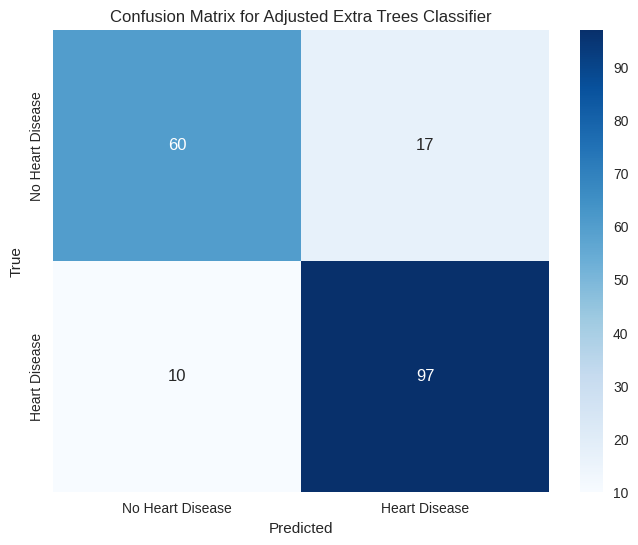

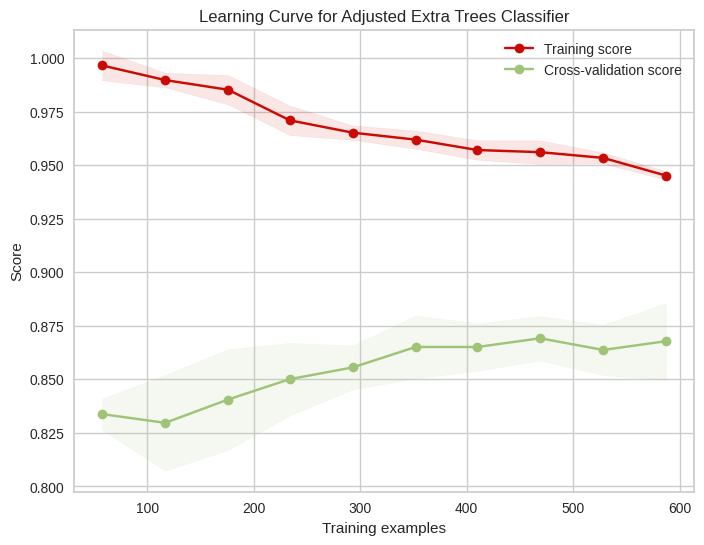

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import binarize

# Assuming data_encoded is already loaded and you have the following structure
X = data_encoded.drop('HeartDisease', axis=1)
y = data_encoded['HeartDisease']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Extra Trees Classifier
etc = ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42)

# Fit the model on the training data
etc.fit(X_train, y_train)

# Get the probability scores for the positive class
y_probs = etc.predict_proba(X_test)[:, 1]  # Assuming the positive class (HeartDisease present) is at index 1

# Adjust the decision threshold
threshold = 0.3  # Set threshold lower than 0.5 to increase sensitivity (recall)
y_pred_adjusted = binarize(y_probs.reshape(-1, 1), threshold=threshold)[:, 0]  # Reshape required for binarize, slice to match shape

# Evaluate the model with the adjusted threshold
print("Adjusted Classification Report:")
print(classification_report(y_test, y_pred_adjusted))
print("Accuracy:", accuracy_score(y_test, y_pred_adjusted))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_adjusted)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Adjusted Extra Trees Classifier')
plt.show()

# Plotting the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    etc, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve for Adjusted Extra Trees Classifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()



#### Observations ####
- The adjustment of the threshold to 0.15-0.25 results fewer false negatives but it also lowers the accuracy score. a class weight of 0.3 strikes a balance between then two and is likely the best choice.  That being said, the best choice really depends on what your goal is with the model. In our case, 0.3 is best.

## Extra Trees Model (Adjust Weight)  ##
#### Adjust weight of positive for heart disease class (heart_disease=1) to be favored ####
- To focus on minimizing false negatives while adjusting class weights in the Extra Trees Classifier, we can explicitly set the weights to favor the positive class even more than what 'balanced' does.  This can be accomplished by customizing class weights to heavily favor the positive class (HeartDisease = 1)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        77
           1       0.89      0.90      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184

Accuracy: 0.875


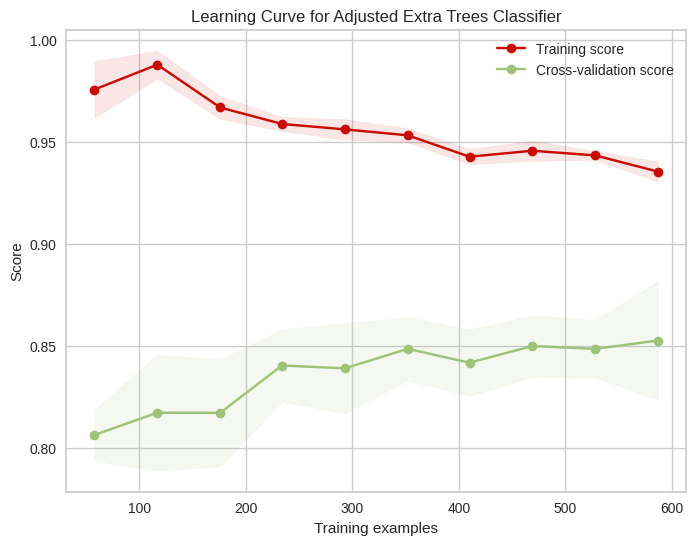

Confusion Matrix:
[[65 12]
 [11 96]]


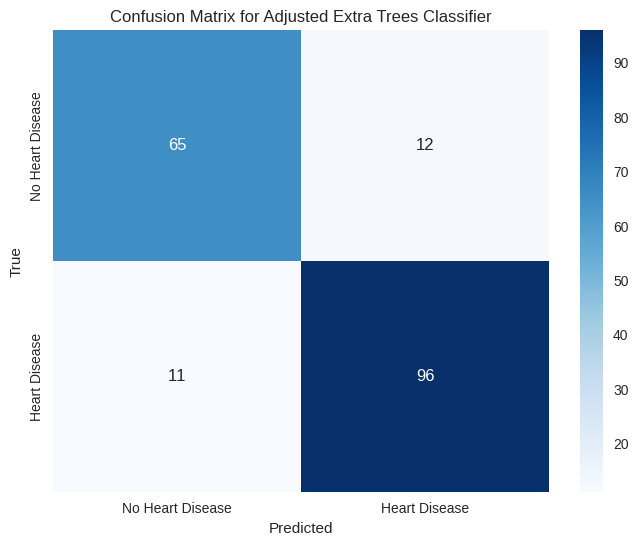

In [ ]:
# Assuming data_encoded is already loaded and you have the following structure
X = data_encoded.drop('HeartDisease', axis=1)
y = data_encoded['HeartDisease']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Extra Trees Classifier with custom class weights
etc = ExtraTreesClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=4,
    class_weight={0: 1, 1: 3},  # Increase the weight of class 1 to emphasize reducing false negatives
    random_state=42
)

# Fit the model
etc.fit(X_train, y_train)

# Predict on the test set
y_pred = etc.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plotting the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    etc, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve for Adjusted Extra Trees Classifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Adjusted Extra Trees Classifier')
plt.show()

### Observations ###
- Adjusting class weight improves both acuracy and recall scores from previous Extra Trees model but failed to beat the results of the original PyCaret Extra Trees model.

### Extra Trees Model (Weighted/ RFE)
- After finding that weighting the false negative class improved model results in order to minimize patients fally told they were not at risk of heart disease, here we will investigate whether using RFE to select only certain important features will improve the model further

Features selected by RFE:
- Age
- FastingBS
- MaxHR
- Oldpeak
- Sex_M
- ChestPainType_ATA
- ChestPainType_NAP
- ExerciseAngina_Y
- ST_Slope_Flat
- ST_Slope_Up
Classification Report after RFE:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        77
           1       0.88      0.88      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184

Accuracy: 0.8586956521739131


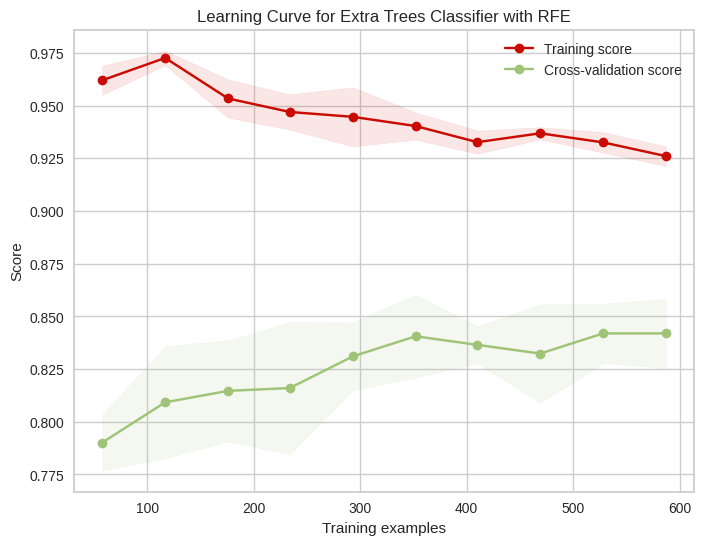

Confusion Matrix with RFE:
[[64 13]
 [13 94]]


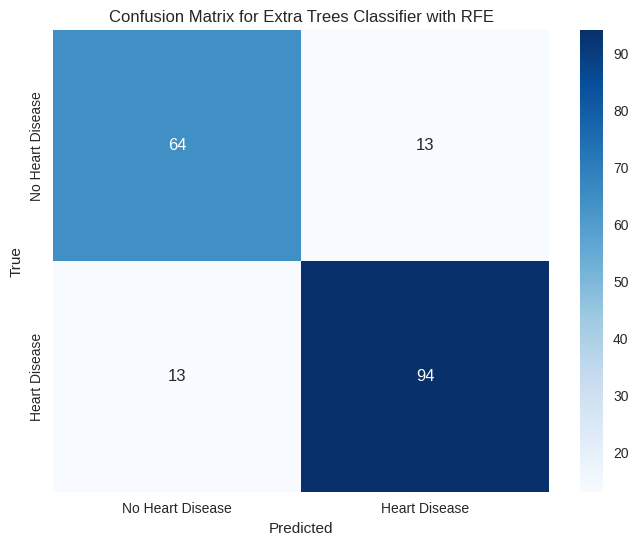

In [ ]:
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize the Extra Trees Classifier with custom class weights for RFE
etc_for_rfe = ExtraTreesClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=4,
    class_weight={0: 1, 1: 3},  # Emphasizing class 1
    random_state=42
)

# Create the RFE model and select attributes
rfe = RFE(estimator=etc_for_rfe, n_features_to_select=10)  # Adjust the number of features as required
rfe = rfe.fit(X_train, y_train)

# Print the mask of selected features
print("Features selected by RFE:")
selected_features = []
for i in range(X_train.shape[1]):
    if rfe.support_[i]:
        selected_features.append(X_train.columns[i])
        print(f"- {X_train.columns[i]}")

# Transform both training and testing sets to only include selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Refit the model on the reduced feature set
etc.fit(X_train_rfe, y_train)
y_pred_rfe = etc.predict(X_test_rfe)

# Evaluate the model with reduced features
print("Classification Report after RFE:")
print(classification_report(y_test, y_pred_rfe))
print("Accuracy:", accuracy_score(y_test, y_pred_rfe))

# Plotting learning curves for the model with selected features
train_sizes, train_scores, test_scores = learning_curve(
    etc, X_train_rfe, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve for Extra Trees Classifier with RFE")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Compute and print the confusion matrix
cm_rfe = confusion_matrix(y_test, y_pred_rfe)
print("Confusion Matrix with RFE:")
print(cm_rfe)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rfe, annot=True, fmt="d", cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Extra Trees Classifier with RFE')
plt.show()




### Observations ###
- Using RFE to subset features failed to improve the model and reduced both accuracy and recall scores.

## Observations (All Models) ##
- It is clear that we do not have enough data to sufficiently train this model.  
- Adjusting class weights and decision threshold only has minimal effect on accuracy and recall scores while each of these strategies does help to reduce the total number of false negatives
- Important features remained consistent across models (feature improtance charts removed form later models to reduce compute requirements) however RFE

Conclusions:
- *Model Performance:* The Extra Trees classifier has indeed shown promising results with an accuracy of 87% and a recall of 91%, which are commendable metrics for a medical prediction model where the cost of false negatives is high.
- *Data Limitations:* The concern about insufficient data to fully optimize the model is valid. The limited size of the dataset (918 data points) restricts the model's ability to generalize and fully converge during training and validation phases.
- *Model Sensitivity:*  Adjusting the model to minimize false negatives by altering decision thresholds or class weights is a strategic move, particularly in medical applications where failing to detect a positive case could lead to non-intervention in critical scenarios.
 * Practical Application:  A less accurate model with fewer false negatives may indeed be preferable in real-world scenarios where the primary concern is to ensure that no potential case of heart disease goes undetected.

#Recommendations:#
- *Data Acquisition:* To address data limitations, actively seek more comprehensive datasets or consider partnerships with medical institutions to gather more extensive data, including more diverse demographic and geographic coverage to improve model robustness and reliability.
- *Threshold Tuning:* Implement systematic threshold tuning to find an optimal balance between sensitivity and specificity. This can be guided by ROC curve analysis to select a threshold that maximizes the true positive rate while keeping the false positive rate at an acceptable level.
- *Deployment Scenario Simulation:* Simulate various deployment scenarios to understand how the model performs in real-world conditions, particularly in emergency rooms or in preventative screenings, where early detection is crucial.
- *Ethical and Bias Consideration:* Conduct bias and fairness assessments to ensure the model does not perpetuate or exacerbate health disparities, particularly across different demographics and socio-economic groups.
- *Stakeholder Engagement:* Regularly engage with stakeholders, including medical professionals and patients, to gather feedback on model outputs and practical implications, ensuring the model aligns with user needs and clinical workflows.
- *Model Updating and Monitoring:* Establish protocols for regular updates and monitoring of the model to adapt to new data and changing health profiles over time, ensuring sustained relevance and accuracy.

